<a href="https://colab.research.google.com/github/hermmanhender/curso-control-optimo-UTNFRLR/blob/main/Actividades/Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1: Control de un motor de CC

Se propone controlar un motor CC que tiene que mantener una velocidad constante, para lo cual se implementó un controlador PID y se emplearon tres ternas de parámetros. 

En este ejemplo se crea una tabla de valores y se utiliza para realizar el control de un motor de CC. Los resultados del control son guardados en una grafica que se puede visualizar al final del código.

## Integración usando Euler en un Motor CC
Se tiene un modelo de un motor de corriente continua con un torque de carga en el rotor, como muestra la Fig. 1-5.

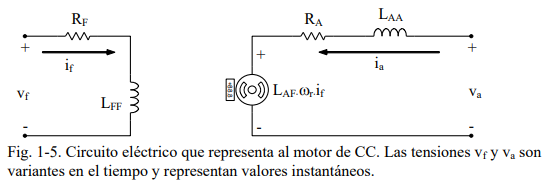

Las especificaciones son los parámetros que se muestran en la Fig. 1-5. y las variables de interés del motor se relacionan según las Ec (21), (22) y (23).

Las variables de interés en el motor de CC son $i_{a}$, $i_{f}$, y $\omega_{r}$. Las ecuaciones que las relacionan dinámicamente son:

$di_{f}/dt = -(R_{F}/L_{FF}) i_{f} + (1/L_{FF}) v_{f}$ (21)

$di_{a}/dt = -(R_{A}/L_{AA}) i_{a} - (L_{AF}/L_{AA}) i_{f} ω_{r} + (1/L_{AA}) v_{a}$ (22)

$dω_{r}/dt = -(B_{m}/J) ω_{r} + (L_{AF}/J) i_{f} i_{a} -(1(J) T_{L}$ (23)

donde $J$ es la inercia del rotor, $B_{m}$ es el amortiguamiento, y $T_{L}$ es el torque de la carga.
Se puede simplificar cuando la corriente de magnetización $i_{f}$ es constante.

Entonces se tiene:
$K_{i} = (L_{AF}/J) i_{f}$ (24)

$T_{m} = K_{i} i_{a}$

$di_{a}/dt = -(R_{A}/L_{AA}) i_{a} - (K_{m}/L_{AA}) ω_{r} + (1/L_{AA}) v_{a}$ (25)

$dω_{r}/dt = -(K_{i}/J) i_{a} + (B_{m}/J) ω_{r} -(1(J) T_{L}$ (26)

De donde la función de transferencia es:

$ω_{r}(s)/v_{a}(s) = (5.57 * 10^9)/(s^2 + 1.52*10^5 s + 2.31*10^7)$

Nótese que los polos son $\lambda_{1} = -1,5185*10^5
, \lambda_{2} = -152,1259$. Aquí se puede encontrar el
tiempo al que corresponde el 95% de la dinámica más rápida $exp(\lambda_{1}t)$ es:

$t_{R}=ln(0.95)/ \lambda_{1}$ (30)

de donde se selecciona el tiempo de integración menor que ése $t_{R}$ calculado, por ejemplo, tres veces menor.

Luego, para calcular el tiempo de simulación en el cual prácticamente ya no hay más transitorios, se toma la constante de tiempo más lenta y se calcula el tiempo para que la $exp(\lambda_{2}t)$ llegue al $5%$, ése tiempo sería

$t_{L} = ln(0.05) /\lambda_{2}$ (31)

Se puede tomar por ejemplo, el triple de ése valor $t_{L}$.

En lo siguiente se detalla el código para simular el desarrollo de las variables de estado con la respuesta al escalón, es decir, $\omega_{Ref} = 1$. En la Tabla 1-2 está el detalle del modelo lineal del motor CC.

### Paso 1:
Se instala el programa Octave.

Este programa establece un lenguage de programación científico que tiene las siguientes características:

* Powerful mathematics-oriented syntax with built-in 2D/3D plotting and visualization tools
* Free software, runs on GNU/Linux, macOS, BSD, and Microsoft Windows
* Drop-in compatible with many Matlab scripts

La documentación completa en: https://octave.org/

**Nota:** Para que no aparezca todo el diálogo de instalación, luego de instalarlo con la celda de código siguiente, volver a ejecutarla.

In [2]:
!apt install octave # Se instala el programa octave
import numpy as np


Reading package lists... Done
Building dependency tree       
Reading state information... Done
octave is already the newest version (4.2.2-1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


### Paso 2:
**Código de integración de Euler para el sistema lineal del motor de CC con PID**

In [ ]:
def euler_PID(X=-[0, 0], 
              ii=0, 
              t_etapa=1e-7, 
              wRef=2, 
              tF=.001, 
              Kp=.500, 
              Ki=0.001, 
              Kd=0.00001, 
              color_='r'):
  Ts = t_etapa
  A1=((2*Kp*Ts)+(Ki*(Ts^2))+(2*Kd))/(2*Ts)
  B1=(-2*Kp*Ts+Ki*(Ts^2)-4*Kd)/(2*Ts)
  C1=Kd/Ts
  e=np.zeros(tF/t_etapa,1)
  u=0
  for k in range(0,tF, t_etapa):
    ii += 1
    k = ii + 2
    X = modmotor(t_etapa, X, u)
    e[k] = wRef-X[0]; #ERROR
    u += A1*e[k] + B1*e[k-1]+C1*e(k-2); %PID
    x1(ii)=X(1);%Omega
    x2(ii)=X(2);%wp
    acc(ii)=u;

In [15]:
%%writefile Tabla_1_1.m
warning('off','all');
clear;%close all;
X=-[0; 0];ii=0;t_etapa=1e-7;wRef=2;tF=.001;
%Constantes del PID
Kp=.500;Ki=0.001;Kd=0.00001;color_='r';
%Kp=1;Ki=0;Kd=0.0001;color_='k';
%Kp=10;Ki=0;Kd=0;color_='b';
Ts=t_etapa;
A1=((2*Kp*Ts)+(Ki*(Ts^2))+(2*Kd))/(2*Ts);
B1=(-2*Kp*Ts+Ki*(Ts^2)-4*Kd)/(2*Ts);
C1=Kd/Ts;
e=zeros(tF/t_etapa,1);u=0;
for t=0:t_etapa:tF
  ii=ii+1;k=ii+2;
  X=modmotor(t_etapa, X, u);
  e(k)=wRef-X(1); %ERROR
  u=u+A1*e(k)+B1*e(k-1)+C1*e(k-2); %PID
  x1(ii)=X(1);%Omega
  x2(ii)=X(2);%wp
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(2,1,1);hold on;
plot(t,x1,color_);title('Salida y, \omega_t');
subplot(2,1,2);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
print(hfig1,'omega_t','-dpng');
% % Para verificar
% Laa=366e-6;
% J=5e-9;
% Ra=55.6;
% B=0;
% Ki=6.49e-3;
% Km=6.53e-3;
% num=[Ki]
save('Tabla_1_1.mat','-v7')

Overwriting Tabla_1_1.m


### Paso 3:
**Código del modelo del sistema lineal del motor de CC**

In [ ]:
def modmotor(t_etapa, xant, accion):
  Laa=366e-6
  J=5e-9
  Ra=55.6
  B=0
  Ki=6.49e-3
  Km=6.53e-3
  Va=accion
  h=1e-7
  omega= xant[0]
  wp= xant[1]

  while ii >=1 and ii <= t_etapa/h:
    wpp =(-wp*(Ra*J+Laa*B)-omega*(Ra*B+Ki*Km)+Va*Ki)/(J*Laa)
    wp=wp+h*wpp
    omega = omega + h*wp

  return [omega,wp]

In [16]:
%%writefile modmotor.m
function [X]=modmotor(t_etapa, xant, accion)
Laa=366e-6; J=5e-9;Ra=55.6;B=0;Ki=6.49e-3;Km=6.53e-3;
Va=accion;
h=1e-7;
omega= xant(1);
wp= xant(2);
for ii=1:t_etapa/h
  wpp =(-wp*(Ra*J+Laa*B)-omega*(Ra*B+Ki*Km)+Va*Ki)/(J*Laa);
  wp=wp+h*wpp;
  omega = omega + h*wp;
end
X=[omega,wp];

Overwriting modmotor.m


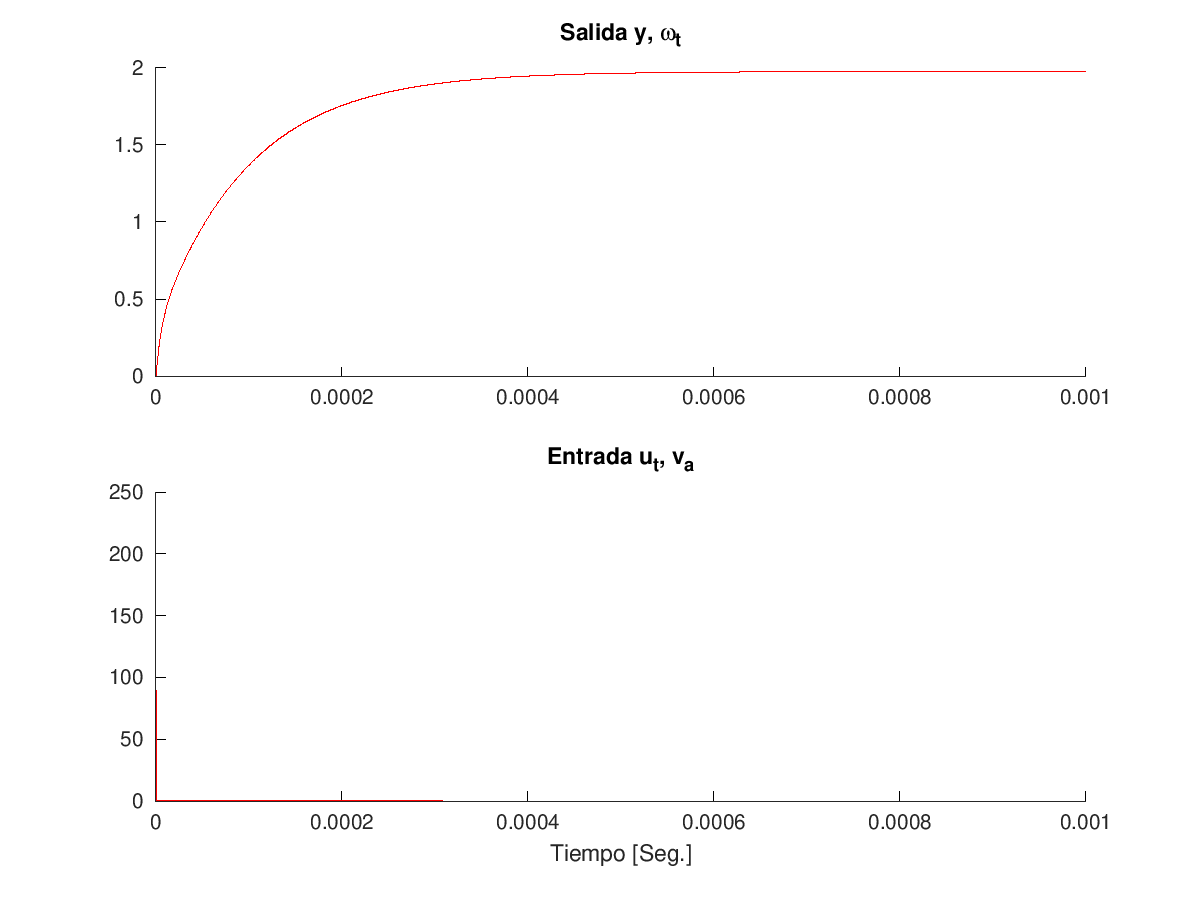

In [17]:
!octave -W Tabla_1_1.m
from PIL import Image
imt = Image.open("/content/omega_t.png")
imt